# Introduction to Scikit-Learn (SKLearn)

This notebook demonstrates some of the most useful functions of the beautiful Sci-Kit Learn Library. 

What we're going to cover:

0. An end-to-end Scikit-Learn Workflow
1. Getting the data ready
2. Choose the right estimator (model, algorithm)
3. Fit the model/estimator/algorithm and use it to make predictions on the data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Put it all together


In [1]:
# Listify the Contents of what we're learning... 
what_we_are_covering = [
    "0. An end-to-end Scikit-Learn Workflow", 
    "1. Getting the data ready",
    "2. Choose the right estimator (model, algorithm)",
    "3. Fit the model/estimator/algorithm and use it to make predictions on the data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Put it all together",
];

# 0. An End-To-End Scikit-Learn Workflow


In [2]:
#1. Get the data ready

# Standar Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease, heart_disease[:5]

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  target  
 0        0   0     1       1  
 1        

In [3]:
# Create X, which is known as the Features Matrix / Data / Features Variable
X = heart_disease.drop("target", axis = 1)

# Create Y, which is known as the Labels Matrix, Labels
Y = heart_disease["target"]

In [4]:
# 2. Choose the Right Model / Estimator / Algorithm  and Hyperparmaters (the dials on the Model to make it better/worse)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We'll use the default Hyperparameters
clf.get_params()



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the Training Data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_Train, Y_test = train_test_split(X,Y, test_size= 0.2)

In [6]:
len(X_test), len(X_train), len(Y_Train), len(Y_test)

(61, 242, 242, 61)

In [7]:
clf.fit(X_train, Y_Train)

RandomForestClassifier()

# Make a prediction

y_label = clf.predict(np.array([0,2,3,4]))

In [8]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [9]:
Y_test

38     1
134    1
58     1
211    0
192    0
      ..
15     1
229    0
233    0
95     1
212    0
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, Y_Train)

1.0

In [11]:
clf.score(X_test, Y_test)

0.7213114754098361

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.68      0.79      0.73        29

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [13]:
confusion_matrix(Y_test, y_preds)

array([[21, 11],
       [ 6, 23]], dtype=int64)

In [14]:
accuracy_score(Y_test, y_preds)

0.7213114754098361

In [15]:
# 5. Improve the model
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, Y_Train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    print("")


Trying model with 10 estimators...
Model accuracy on test set: 70.49%

Trying model with 20 estimators...
Model accuracy on test set: 70.49%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 72.13%

Trying model with 50 estimators...
Model accuracy on test set: 73.77%

Trying model with 60 estimators...
Model accuracy on test set: 73.77%

Trying model with 70 estimators...
Model accuracy on test set: 73.77%

Trying model with 80 estimators...
Model accuracy on test set: 73.77%

Trying model with 90 estimators...
Model accuracy on test set: 75.41%



In [16]:
#6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_clf = pickle.load((open("random_forest_model_1.pkl", "rb")))
loaded_clf.score(X_test, Y_test)

0.7540983606557377

In [18]:
adjusted_model = RandomForestClassifier(n_estimators=60)
adjusted_model.fit(X_train, Y_Train)

adjusted_model.score(X_train, Y_Train)

1.0

In [19]:
adjusted_model.score(X_test, Y_test)

0.7540983606557377

In [20]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
executable: C:\Projects\first-machine-learning-project\env\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
          pip: 21.2.2
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.19.2
        scipy: 1.6.2
       Cython: None
       pandas: 1.2.3
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.2.0

Built with OpenMP: True


In [21]:
sklearn.show_versions()


System:
    python: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
executable: C:\Projects\first-machine-learning-project\env\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
          pip: 21.2.2
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.19.2
        scipy: 1.6.2
       Cython: None
       pandas: 1.2.3
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.2.0

Built with OpenMP: True


In [22]:
what_we_are_covering

['0. An end-to-end Scikit-Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator (model, algorithm)',
 '3. Fit the model/estimator/algorithm and use it to make predictions on the data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Put it all together']

# 1. Getting the Data Ready to be used with machine learning


Three main things we have to do to get the data ready are:

    1. Split the data into features and lables (usually known as `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numeric values to numeric values (also called Feature Encoding)

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X = heart_disease.drop("target", axis = 1);
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y = heart_disease["target"];
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
len(X), len(y)

(303, 303)

In [27]:
# Split the Data into Training and Test Sets... 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [28]:
X_train.shape, X_test.shape, y_test.shape, y_test.shape

((151, 13), (152, 13), (152,), (152,))

In [29]:
X.shape, heart_disease.shape

((303, 13), (303, 14))

In [30]:
car_sales = pd.read_csv("data/car-sales.csv")

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [32]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [33]:
X = car_sales.drop("Price", axis = 1)

In [34]:
y = car_sales["Price"]

In [35]:
X, y

(     Make Colour  Odometer (KM)  Doors
 0  Toyota  White         150043      4
 1   Honda    Red          87899      4
 2  Toyota   Blue          32549      3
 3     BMW  Black          11179      5
 4  Nissan  White         213095      4
 5  Toyota  Green          99213      4
 6   Honda   Blue          45698      4
 7   Honda   Blue          54738      4
 8  Toyota  White          60000      4
 9  Nissan  White          31600      4,
 0     $4,000.00
 1     $5,000.00
 2     $7,000.00
 3    $22,000.00
 4     $3,500.00
 5     $4,500.00
 6     $7,500.00
 7     $7,000.00
 8     $6,250.00
 9     $9,700.00
 Name: Price, dtype: object)

In [36]:
X.shape, y.shape, car_sales.shape

((10, 4), (10,), (10, 5))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [38]:
X_train, X_test

(     Make Colour  Odometer (KM)  Doors
 1   Honda    Red          87899      4
 6   Honda   Blue          45698      4
 9  Nissan  White          31600      4
 2  Toyota   Blue          32549      3
 7   Honda   Blue          54738      4
 5  Toyota  Green          99213      4
 4  Nissan  White         213095      4
 0  Toyota  White         150043      4,
      Make Colour  Odometer (KM)  Doors
 8  Toyota  White          60000      4
 3     BMW  Black          11179      5)

In [39]:
X_train.shape, X_test.shape

((8, 4), (2, 4))

In [40]:
#clf.fit(X_train, y_train)

In [41]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder();
print(label_encoder.fit_transform(car_sales["Make"]))

[3 1 3 0 2 3 1 1 3 2]


In [42]:
print(label_encoder.fit_transform(car_sales["Colour"]))

[4 3 1 0 4 2 1 1 4 4]


# About to learn how to convert data to numbers

# 1.1 Make sure all the Data is all numerical

In [43]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head(), len(car_sales)

(     Make Colour  Odometer (KM)  Doors  Price
 0   Honda  White          35431      4  15323
 1     BMW   Blue         192714      5  19943
 2   Honda  White          84714      4  28343
 3  Toyota  White         154365      4  13434
 4  Nissan   Blue         181577      3  14043,
 1000)

In [44]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [45]:
# Split the data in X & y (Features & Labels)
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

In [46]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [47]:
# Split into traing and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [48]:
len(X_train), len(X_test)

(800, 200)

In [49]:
# Build a Machine Learning Model
#from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [50]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [51]:
# Turn the Features/Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

#Init the Transformers & Encoders
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [52]:
df = pd.DataFrame(transformed_X)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [53]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [54]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [55]:
# Let's refit the model

# np.random.seed(42)
# X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# model.fit(X_train, y_train)


In [56]:
# model.score(X_test, y_test)

# 1.2 -> What if there were missing values 


1. Fill them with some values (also known as imputation)
2. Remove the Samples with missing data

In [57]:
# Import Missing Data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv");
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [58]:
# Find the Number of missing values in a Dataframe
car_sales_missing.isna().sum(), car_sales.isna().sum()

(Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64,
 Make             0
 Colour           0
 Odometer (KM)    0
 Doors            0
 Price            0
 dtype: int64)

In [59]:
# Transfrom the data into X and y
X_missing = car_sales_missing.drop("Price", axis = 1)
y_missing = car_sales_missing["Price"]

X_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

In [60]:
# Let's try to convert the missing data to numbers

# Turn the Features/Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

#Init the Transformers & Encoders
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X_missing)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [61]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [62]:
transformed_X.dtype, X_missing.dtypes

(dtype('float64'),
 Make              object
 Colour            object
 Odometer (KM)    float64
 Doors            float64
 dtype: object)

# Fill the Missing Data with pandas

In [63]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace= True)

# Fill the "Colour Column"
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace= True)

In [64]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [65]:
car_sales_missing["Doors"].value_counts()

4.0    861
5.0     75
3.0     64
Name: Doors, dtype: int64

In [66]:
car_sales_missing["Make"].value_counts()

Toyota     379
Honda      292
Nissan     183
BMW         97
missing     49
Name: Make, dtype: int64

In [67]:
# Remove rows with missing data in the Labels
car_sales_missing.dropna(inplace = True)

In [68]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [69]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [70]:
len(car_sales_missing)

950

In [71]:
# Get the Features & Labels of the Filled Missing Data frame

X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [72]:
len(X), len(y)

(950, 950)

In [73]:
# Convert the missing data to numbers

# Turn the Features/Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

#Init the Transformers & Encoders
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [74]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [75]:
    # 2. Fill the Missing Data with the Scik-Kit Learn library

    car_missing_missing = pd.read_csv("data/car-sales-extended-missing-data.csv");
    car_missing_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [76]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [77]:
# Drop the Rows from the Car Sales Dataset with No Labels
car_missing_missing.dropna(subset=["Price"], inplace= True)

In [78]:
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [79]:
len(car_missing_missing)

950

In [80]:
# Split the Data into X (Features) & Y (Labels)

X = car_missing_missing.drop("Price", axis = 1)
y = car_missing_missing["Price"]

X.head(), y.head()

(     Make Colour  Odometer (KM)  Doors
 0   Honda  White        35431.0    4.0
 1     BMW   Blue       192714.0    5.0
 2   Honda  White        84714.0    4.0
 3  Toyota  White       154365.0    4.0
 4  Nissan   Blue       181577.0    3.0,
 0    15323.0
 1    19943.0
 2    28343.0
 3    13434.0
 4    14043.0
 Name: Price, dtype: float64)

In [81]:
# Fill Missing Values in the Car Sales Dataset with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

numerical_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data... kinda the opposite of amputate)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_inputer", numerical_imputer, num_feature)
])


# Transform the data...
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [82]:
car_sales_filled  = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head(), len(car_sales_filled)

(     Make Colour Doors Odometer (KM)
 0   Honda  White   4.0       35431.0
 1     BMW   Blue   5.0      192714.0
 2   Honda  White   4.0       84714.0
 3  Toyota  White   4.0      154365.0
 4  Nissan   Blue   3.0      181577.0,
 950)

In [83]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [84]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

#Init the Transformers & Encoders
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [86]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2);


# Create the Model
model = RandomForestRegressor();
model.fit(X_train, y_train); 


#Evaluate the Model...
model.score(X_test, y_test)






0.21990196728583944

In [87]:
what_we_are_covering

['0. An end-to-end Scikit-Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator (model, algorithm)',
 '3. Fit the model/estimator/algorithm and use it to make predictions on the data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Put it all together']

# 2. Choosing the Right Estimator / Algorithm / Model for our problem

Scikit-Learn (SkLearn) uses the word 'estimator' as another term for machine learning model / algorithm


* Classification - predicting whether a sample is one thing or another
* Regression - prediciting a number



### 2.1 Picking a machine learning model for a regression problem

In [88]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

boston;

In [89]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [90]:
len(boston_df)

506

In [91]:
# How many samples?  #Done this already... 
len(boston_df)

506

In [92]:
# Let's try the Ridge regression model
from sklearn.linear_model import Ridge

# Setup Random Seed
np.random.seed(42)


# Create the data
X = boston_df.drop('target', axis = 1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate the Estimator 
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

In [93]:
# Find the number of samples in the training and test library... 
len(X_train), len(X_test)

(404, 102)

# How do we improve this score? 

## What if Ridge isn't working?

Let's refer back to the map on Scikit Learn documentation
- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [94]:
# Let's try the RandomForest Regressor

from sklearn.ensemble import RandomForestRegressor

# Setup the Random Seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis = 1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


#Initiate the Regressor Estimator
rf = RandomForestRegressor()
rf.fit(X_train, y_train);

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test), rf.score(X_train, y_train);


In [95]:
# Check the Ridge Model again 
model.score(X_test, y_test)

0.6662221670168522

In [96]:
rf.score(X_test, y_test)

0.8654448653350507

In [97]:
### 2.2 Choose which estimator for choosing a Classification model - The Heart Disease Data-set

heart_disease = pd.read_csv("data/heart-disease.csv");
len(heart_disease)

303

In [98]:
# Find if there are missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [99]:
len(heart_disease)

303

In [100]:
# Get the Features and the Target Label of the Heart Disease data-set
X = heart_disease.drop("target", axis= 1);
Y = heart_disease["target"];

# Split the X & Y Dataset into train & test data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Check the length of the split data to make sure it's been split properly
len(X_train), len(X_test), len(y_test)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train) #Fit the data to the model

clf.score(X_test, y_test) #Pretty high score... 


0.7049180327868853

In [101]:
what_we_are_covering

['0. An end-to-end Scikit-Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator (model, algorithm)',
 '3. Fit the model/estimator/algorithm and use it to make predictions on the data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Put it all together']

# He's using Linear SVC, not sure why he chose this one though

In [102]:
# Import the Linear SVC from sklearn
from sklearn.svm import LinearSVC

# Setup the Random Seed
np.random.seed(42)

# Make the Data
X = heart_disease.drop("target", axis = 1)
y  = heart_disease["target"]

# Split the data into training & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Find the data
len(X_test), len(X_train)

# Init the Classifier 
clf = LinearSVC(max_iter=120000000, dual=False)

#Fit the Data to the model
clf.fit(X_train, y_train)

# Evaluate & Score the LinearSVC
clf.score(X_test, y_test)

# Higher than the one I chose


0.8688524590163934

In [103]:
# Import the RandomForest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Setup the Random Seed
np.random.seed(42)

# Make the Data
X = heart_disease.drop("target", axis = 1)
y  = heart_disease["target"]

# Split the data into training & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Find the data
len(X_test), len(X_train)

# Init the Classifier 
clf = RandomForestClassifier()

#Fit the Data to the model
clf.fit(X_train, y_train)

# Evaluate & Score the RandomForestClassifier
clf.score(X_test, y_test)

# Lower than the Linear SVC (not sure why I'm getting a different results from him)

0.8524590163934426

In [104]:
what_we_are_covering

['0. An end-to-end Scikit-Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator (model, algorithm)',
 '3. Fit the model/estimator/algorithm and use it to make predictions on the data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Put it all together']

## 3. Fit the Model/Estimator on our data and it use to make predictions

### 3.1 Fitting the model to the data

Different names for Features & Targets
* `X` => Features, Features Variables, Data
* `y` = Labels, Targets, Target Variables, 

In [105]:
# Import the RandomForest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Setup the Random Seed
np.random.seed(42)

# Make the Data
X = heart_disease.drop("target", axis = 1)
y  = heart_disease["target"]

# Split the data into training & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Find the data
len(X_test), len(X_train)

# Init the Classifier 
clf = RandomForestClassifier()

#Fit the Model to the data, fit the model to the data
clf.fit(X_train, y_train)

# Evaluate & Score the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [106]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [107]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [108]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [109]:
# The most important thing is to remember that Fitting the Model to the Data is the machine/computer looking for patterns in the data/features that results in the label/target. 
# Pretty interesting... 

# During Testing/Production, it would use the patterns the model has learned to derive the predictions. 


# 3.2 Make predictions using the Machine Learning Model


### How can we use the Model to make predictions on data the algo/estimator hasn't seen yet


2 Ways to make predictions:

1. `predict()`
2. `predict_proba()`


In [110]:
clf.score(X_test, y_test)

0.8524590163934426

In [111]:
# Use a trained model to make predictions

# Get Data from the Test Data-set
data = X_test.iloc[8];
shaped_data = data.values.reshape(1, 13) #Reshape the Data into what the Model can accept

clf.predict(shaped_data) #Predict the Target (Whether or not the User has Heart-Disease)

array([0], dtype=int64)

In [112]:
# Look at Tutor's way of making predictions

X_test.shape

(61, 13)

In [113]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [114]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [115]:
# Compare Predictions to Truth Labels (The Test Labels) to Evaluate the model
y_preds = clf.predict(X_test);
np.mean(y_preds == y_test)

0.8524590163934426

In [116]:
clf.score(X_test, y_test)

0.8524590163934426

In [117]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

# Make Predictions with `predict_proba()`

Predict_Proba returns probabilities of a classification model

In [118]:
# Make Predictions with `predit_proba()`

# It returns probabilities of a classification label
clf.predict_proba(X_test[:5]);


In [119]:
# Let's predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [120]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [121]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [122]:
y_test[:5], clf.predict_proba(X_test[:5])

(179    0
 228    0
 111    1
 246    0
 60     1
 Name: target, dtype: int64,
 array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82]]))

# Usage of `predict_proba`

We could filter the samples based on how high the probability of the predictions. We get to understand how much how our model is confident with predicting the labels.

# Predicting Prices of Houses in Boston using the RandomForestRegressor

In [123]:
# Let's try the RandomForest Regressor

from sklearn.ensemble import RandomForestRegressor

# Setup the Random Seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis = 1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


#Initiate the Regressor Estimator
rf = RandomForestRegressor()
rf.fit(X_train, y_train);

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test), rf.score(X_train, y_train)

(0.8654448653350507, 0.9763520974033731)

In [124]:
rf.predict(X_test[:1])

array([23.081])

In [125]:
y_test[:1]

173    23.6
Name: target, dtype: float64

In [126]:
rf.predict(X_test[:5])

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [127]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

In [128]:
boston_df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [129]:
from sklearn.metrics import accuracy_score

y_preds = rf.predict(X_test)

#accuracy_score(y_test, y_preds)

# `predict()` can also be used for regression models.

In [130]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


# Create the data
X = boston_df.drop("target", axis = 1);
y = boston_df["target"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);


# Init and fit model (train the model on the patterns in the data)
model = RandomForestRegressor().fit(X_train, y_train)

#Make predictions using the Trained Model
y_preds = model.predict(X_test)

In [131]:
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [132]:
y_preds[:5], np.array(y_test[:5])

(array([23.081, 30.574, 16.759, 23.46 , 16.893]),
 array([23.6, 32.4, 13.6, 22.8, 16.1]))

In [133]:
# Evaluating the Regression Model - Compare the Predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)



2.136382352941176

In [134]:
what_we_are_covering

['0. An end-to-end Scikit-Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator (model, algorithm)',
 '3. Fit the model/estimator/algorithm and use it to make predictions on the data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Put it all together']

# Evaluating a Machine Learning Model

In [135]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"];

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2);

clf = RandomForestClassifier();
clf.fit(X_train, y_train);

clf.score(X_test, y_test)

0.7892561983471075

# 3 Ways to evaluate Sci-kit Learn Models/Estimators:

1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions


# 1. Evaluating a Model with the `score` Method

In [136]:
clf.score(X_test, y_test)

0.7892561983471075

In [137]:

# Doing the Scoring for the Regression Model... 

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis =1)
y = boston_df["target"];

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2);

#FIt the Models. 
clf = RandomForestRegressor();
clf.fit(X_train, y_train);

clf.score(X_test, y_test)


0.8234340729453582

# 4.2 Evaluating a model using the `scoring` parameter

In [138]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"];

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2);

clf = RandomForestClassifier();
clf.fit(X_train, y_train);


In [139]:
clf.score(X_test, y_test)

0.7892561983471075

In [140]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

# What is cross validation

# Cross Validation splits the data into different Test & Training (different sets) of the data

# It aims to train & test on every facet of the data. And evaluated on every facet of the data. 

In [141]:
cross_val_score(clf, X, y, cv=30)

array([1.        , 0.81818182, 0.90909091, 0.7       , 1.        ,
       0.6       , 0.9       , 0.8       , 0.8       , 0.9       ,
       0.9       , 0.9       , 1.        , 0.8       , 0.8       ,
       0.7       , 0.8       , 0.8       , 0.8       , 0.6       ,
       0.9       , 0.7       , 0.9       , 0.9       , 0.6       ,
       0.8       , 0.7       , 0.9       , 0.7       , 0.8       ])

In [142]:
np.random.seed(42)

# Single Training and Test Split Score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 10-Fold Cross-Validation Score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 10))

# Compare the Two Values
clf_single_score, clf_cross_val_score

(0.7892561983471075, 0.8183870967741935)

In [143]:
# Scoring Parameter set to None by default
cross_val_score(clf, X, y, cv = 5, scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

# Default Scoring Parameter of Classifier = Mean Accuracy
# So, when scoring is set to None, it uses the Default Scoring of the Estimator.
# So, that means, we can change what it is used to `score` the Model/Estimator

## Other Classification Scores would be covered soon

# Cross Validation allows the Model to be trained on all Data, and tested on all Data
# I guess this would ideally prevent Bias in the Data
# Cool

# - 
# - 
# - 
# - 
# - 
# 4.2.1 -> Classifcation Model EValuation Metrices

1. Accuracy
2. Area under ROC curev
3. Confusion Matrix
4. Classification report

In [144]:
### ----- Accuracy - Evaluating a Model using Accuracy ----- 

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42);


X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']


clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=10) ##Check the accuracy of the data split in 10 ways.. 

In [145]:
np.mean(cross_val_score)

0.8183870967741935

In [146]:
print (f"Heart Disease Cross Validation (CV) Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Cross Validation (CV) Classifier Accuracy: 81.84%


In [147]:
# Given a random sample, 
# we're checking & evaluating how likely it is for it to return an accurate socre. 

In [148]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Next - We'll dive into Areas into a ROC curve

**Area under the receiver operating characteristic curve (ROC, AUC)**
 
# Receiver operating characteristic (ROC)

- What is this? 
    
    Formal Definition: It's (ROC) a comparison of the model's true positive rate (TPR) versus the model's false positive rate (FPR)

    * True Positive = Model predicts 1 when the truth is 1 
    * False Positive = Model predicts 1 when truth is 0
    * True Negative = Model predicts 0 when the truth is 0
    * False Negative = Model predicts 0 when the truth is 1



- Area under Curve (AUC)
- ROC curve

In [149]:
# Create X_test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit the Classifier
clf.fit(X_train, y_train);

In [150]:
from sklearn.metrics import roc_curve


# Make predictions with probabilites

y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)


(array([[0.11, 0.89],
        [0.53, 0.47],
        [0.09, 0.91],
        [0.39, 0.61],
        [0.23, 0.77],
        [0.01, 0.99],
        [0.61, 0.39],
        [0.45, 0.55],
        [0.11, 0.89],
        [0.87, 0.13]]),
 61)

In [151]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13])

In [152]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the False Positive Rates
fpr

array([0.     , 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.09375, 0.15625, 0.15625, 0.1875 , 0.1875 , 0.21875, 0.21875,
       0.3125 , 0.34375, 0.34375, 0.40625, 0.59375, 0.65625, 0.75   ,
       0.9375 , 1.     ])

# Plot the Data (FPR/TPR) -> (False Positive Rate / True Positive Rate) into a Chart/Graph

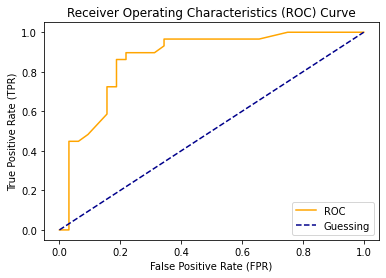

In [153]:
# Create a function for plotting ROC Curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr of a model.)
    """

    # Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")

    #Customize the pLot
    plt.xlabel("False Positive Rate (FPR)");
    plt.ylabel("True Positive Rate (TPR)");
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()

    # Display the Plot
    plt.show()



plot_roc_curve(fpr, tpr)

In [154]:
 from sklearn.metrics import roc_auc_score

 roc_auc_score(y_test, y_probs_positive)

0.8679956896551724

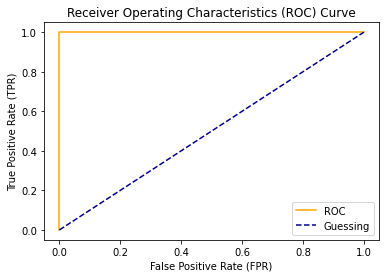

In [155]:
# Plot perfect ROC Curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [156]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

# Next Classification Metirc -> Confusion Matrix


What is a Confusion matrix? 

It's a quick qay to compare the labels of a model predicts and the actual labels it was supposed to predict. 

In essence, giving you and idea of where the model is getting confused. 

In [157]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  8],
       [ 3, 26]], dtype=int64)

In [158]:
# Visualize the COnfusion matrix with pd.crosstab

pd.crosstab(y_test, y_preds, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,8
1,3,26


In [159]:
22 + 7 + 8 + 24

61

In [160]:
len(y_preds)

61

In [161]:
24 + 8 + 3 +26

61

In [162]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




<AxesSubplot:>

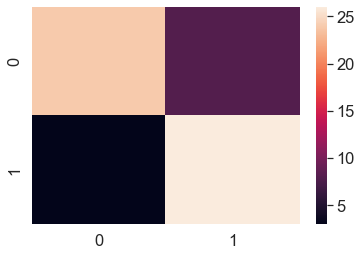

In [163]:
# Make our Confusion Matrix more visual with Seaborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using the Seaborn Heatmap
sns.heatmap(conf_mat)

In [164]:
# Installed the Seaborn Library on the Jupyter Notebook sweet.... 

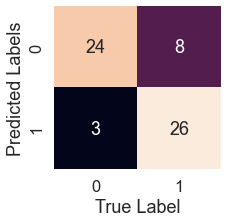

In [165]:
# Make our Confusion Matrix more visual with Seaborn's heatmap()

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, 
                        annot=True, #Annotate the boxes with the conf-mat info
                        cbar = False);

    plt.xlabel("True Label");
    plt.ylabel("Predicted Labels");

    # Fix the broken annotation 


plot_conf_mat(conf_mat)
    

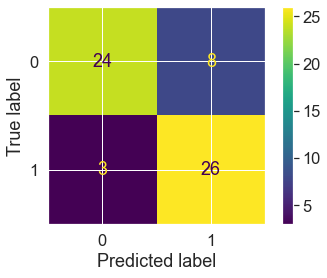

In [168]:
from sklearn.metrics import plot_confusion_matrix

# Plotted Confusion Matrix using Seaboarn and the Sci-kit Learn 
plot_confusion_matrix(clf, X_test, y_test)

# Classification Report

In [169]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [171]:
# Where Precision and Recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000); # Model predicts every cas as 0


pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Projects\first-machine-learning-project\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\first-machine-learning-project\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\first-machine-learning-project\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [ ]:
# Using other evaluation metrics gives a bigger picture of what's happening with the Model... 
# All I'm seeing is that it's important that when working with the data... there are no biases introduced.... and it's pretty interesting.... 

# And there are more evaluation metrics... wow.. quite a number... 